# Purpose
The purpose of this notebook is to solve first- and second-order ODEs using different methods.

## Methodology
This notebook uses the libraries integrate.odeint and integrate.solve_ivp from python package scipy to solve first- and second-order differential equations. The methods are compared. 
<br><br>
Their documentation can be found here:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
<br><br>

A good site to learn the math behind differential equations can be found at:
https://tutorial.math.lamar.edu/Classes/DE/DE.aspx

## Results
The ODE solver solve_ivp seems to be a better choice when it comes to solving differential equations. It allows for a chosen error tolerance, as well as different iterative methods such as RK45 for standard differential equations and Radau for stiff equations. The way to initialize the solvers is slightly different, but the overall process is very similar.

# Notebook Setup

## Library import
We import all the required Python libraries

In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

# Autoreload extension
%load_ext autoreload
%autoreload 2

In [2]:
from plots import setup_rc_params
from plots import velocity_vs_time_graph, second_order_diff_eq_graph
from plots import projectile_motion_graph, free_fall_graph

# Implementation

In [3]:
setup_rc_params(dpi=800)

In [4]:
# The comment info() allows us to get information about the chosen package.
# This includes things like the definition, parameters, returns, examples.
np.info(odeint)

 odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None,
        mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0,
        ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0,
        tfirst=False)

Integrate a system of ordinary differential equations.

.. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
          differential equation.

Solve a system of ordinary differential equations using lsoda from the
FORTRAN library odepack.

Solves the initial value problem for stiff or non-stiff systems
of first order ode-s::

    dy/dt = func(y, t, ...)  [or func(t, y, ...)]

where y can be a vector.

.. note:: By default, the required order of the first two arguments of
          `func` are in the opposite order of the arguments in the system
          definition function used by the `scipy.integrate.ode` class and
          the function `scipy.integrate.solve_ivp`. To use a function with
          the signature ``func(t, y,

## Solving first-order ODE using odeint solver
Let us now try implementing the function odeint.

Consider the example
<br><br>
$$
\frac{dv}{dt} = g, \quad \mbox{with initial condition} \quad v(0) = 5
$$
<br><br>
where $g = 9.81 \; \mbox{m/s}^2$.

In [5]:
# We first define a function for the derivative.
def dv_dt(y, x):
    """
    Returns the right side of our first-order differential equation.
    """
    g = -9.8
    return g
    

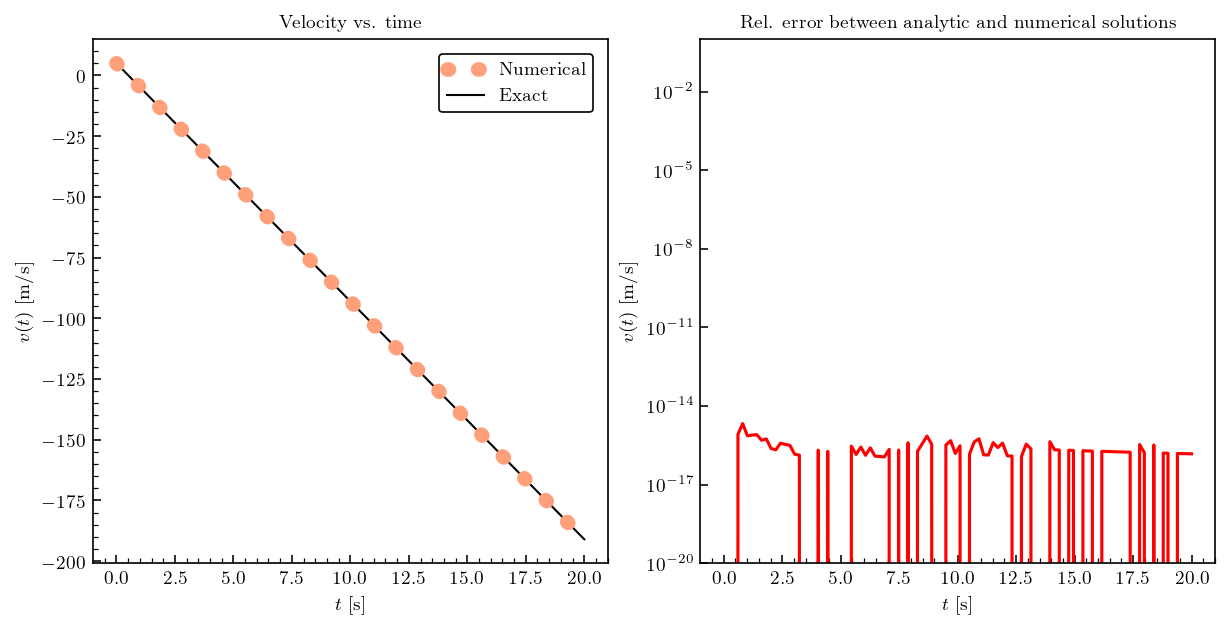

In [6]:
# We need to define our x values and initial condition, then use odeint.
t_pts = np.linspace(0, 20, 100)
v0 = 5.0

v_sol = odeint(dv_dt, v0, t_pts)

g = -9.8
v_exact = v0 + g * t_pts

velocity_vs_time_graph(t_pts, v_exact, v_sol, "Rel.")

## Solving second-order ODEs using odeint solver
### Free-fall
We now try to solve a second-order differential equation. In the spirit of the previous example let us consider Newton's equation $F = ma$ with $F = mg$ (free-fall)
<br><br>
$$
x^{\prime \prime} = g \quad \mbox{with} \quad x(0) = 100, \, x^{\prime}(0) = 0.
$$
<br><br>
In order to solve a second-order differential equation we must turn it into two first-order differential equations. Let $u = x^{\prime}$,
<br><br>
$$
u^{\prime} = g \quad \mbox{with} \quad x(0) = 100, \, u(0) = 0.
$$
<br><br>
We can write this as a vector
<br><br>
$$
  \mathbf{U}(x) = \left(\begin{array}{c}
                         x(x) \\
                         u(x)
                        \end{array}
                  \right)
        \quad\Longrightarrow\quad
    \frac{d\mathbf{U}}{dx} = 
                             \left(\begin{array}{c}
                                    x' \\
                                    u'
                                   \end{array}
                             \right) 
                           =  
                             \left(\begin{array}{c}
                                    u \\
                                    g
                                   \end{array}
                             \right)
              \quad\mbox{with}\quad
    \mathbf{U}(0) = \left(\begin{array}{c}
                         100 \\
                         0
                        \end{array}
                  \right).
$$
<br><br>
We now proceed to solve the differential equation using the same process of solving a first-order differential equation.

In [7]:
# First define a function for the derivatives.
def dU_dt(U, t):
    """
    Returns the right side of our first-order differential equation matrix.
    U is a two-component vector with x=U[0] and u=U[1]. 
    Output: [x', u']
    """
    g = -9.8
    u = U[1]
    u_prime = g 
    return u, u_prime


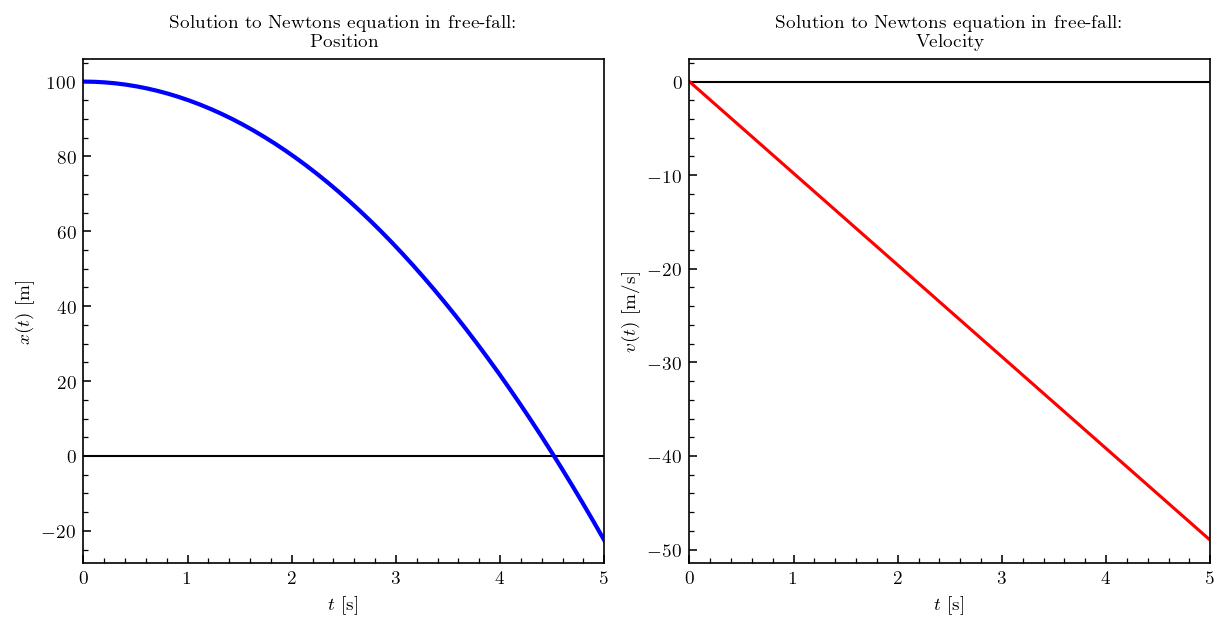

In [8]:
# We need to define our x values and initial condition, then use odeint.
t_pts = np.linspace(0, 5, 50)
U0 = [100.0, 0.0]

U_sol = odeint(dU_dt, U0, t_pts)

# The ode solver outputs a two-dimensional vector. 
# The first element corresponds to the position, the second to velocity.
x_vals = U_sol[:,0]
dx_vals = U_sol[:,1]

free_fall_graph(t_pts, x_vals, dx_vals)

### Projectile motion
Now that we can solve the free-fall problem let us give projectile motion a try. The process is the same as before only we have two equations to solve with different initial conditions change
<br><br>
$$
x^{\prime \prime} = 0 \quad \mbox{with} \quad x(0) = 0, \, x^{\prime}(0) = v_0 \cos(\theta),\\
y^{\prime \prime} = g \quad \mbox{with} \quad y(0) = 0, \, y^{\prime}(0) = v_0 \sin(\theta).
$$
<br><br>
In order to solve the second-order differential equation we must turn each into two first-order differential equations.<br> 
Let $u = x^{\prime}$ and $v = y^{\prime}$,
<br><br>
$$
u^{\prime} = 0 \quad \mbox{with} \quad x(0) = 0, \, u(0) = v_0 \cos(\theta),\\
v^{\prime} = g \quad \mbox{with} \quad y(0) = 0, \, v(0) = v_0 \sin(\theta).
$$
<br><br>
We can write these as vectors
<br><br>
$$
  \mathbf{U}(t) = \left(\begin{array}{c}
                         x(t) \\
                         u(t)
                        \end{array}
                  \right)
        \quad\Longrightarrow\quad
    \frac{d\mathbf{U}}{dt} = 
                             \left(\begin{array}{c}
                                    x' \\
                                    u'
                                   \end{array}
                             \right) 
                           =  
                             \left(\begin{array}{c}
                                    u \\
                                    0
                                   \end{array}
                             \right)
              \quad\mbox{with}\quad
    \mathbf{U}(0) = \left(\begin{array}{c}
                         0 \\
                         v_0 \cos(\theta)
                        \end{array}
                  \right),\\
  \mathbf{V}(t) = \left(\begin{array}{c}
                         y(x) \\
                         v(x)
                        \end{array}
                  \right)
        \quad\Longrightarrow\quad
    \frac{d\mathbf{V}}{dt} = 
                             \left(\begin{array}{c}
                                    y' \\
                                    v'
                                   \end{array}
                             \right) 
                           =  
                             \left(\begin{array}{c}
                                    v \\
                                    g
                                   \end{array}
                             \right)
              \quad\mbox{with}\quad
    \mathbf{V}(0) = \left(\begin{array}{c}
                         0 \\
                         v_0 \sin(\theta)
                        \end{array}
                  \right).
$$
<br><br>
We now proceed to solve the differential equation as before.

In [9]:
# First define a function for the derivatives.
def dU_dt_x(U, t):
    """
    Returns the right side of our first-order differential equation matrix.
    U is a two-component vector with x=U[0] and u=U[1]. 
    Output: [x', u']
    """
    u = U[1]
    u_prime = 0
    
    return u, u_prime

def dU_dt_y(U, t):
    """
    Returns the right side of our first-order differential equation matrix.
    U is a two-component vector with y=U[0] and v=U[1]. 
    Output: [y', v']
    """
    g = -9.8
    u = U[1]
    u_prime = g
    
    return u, u_prime


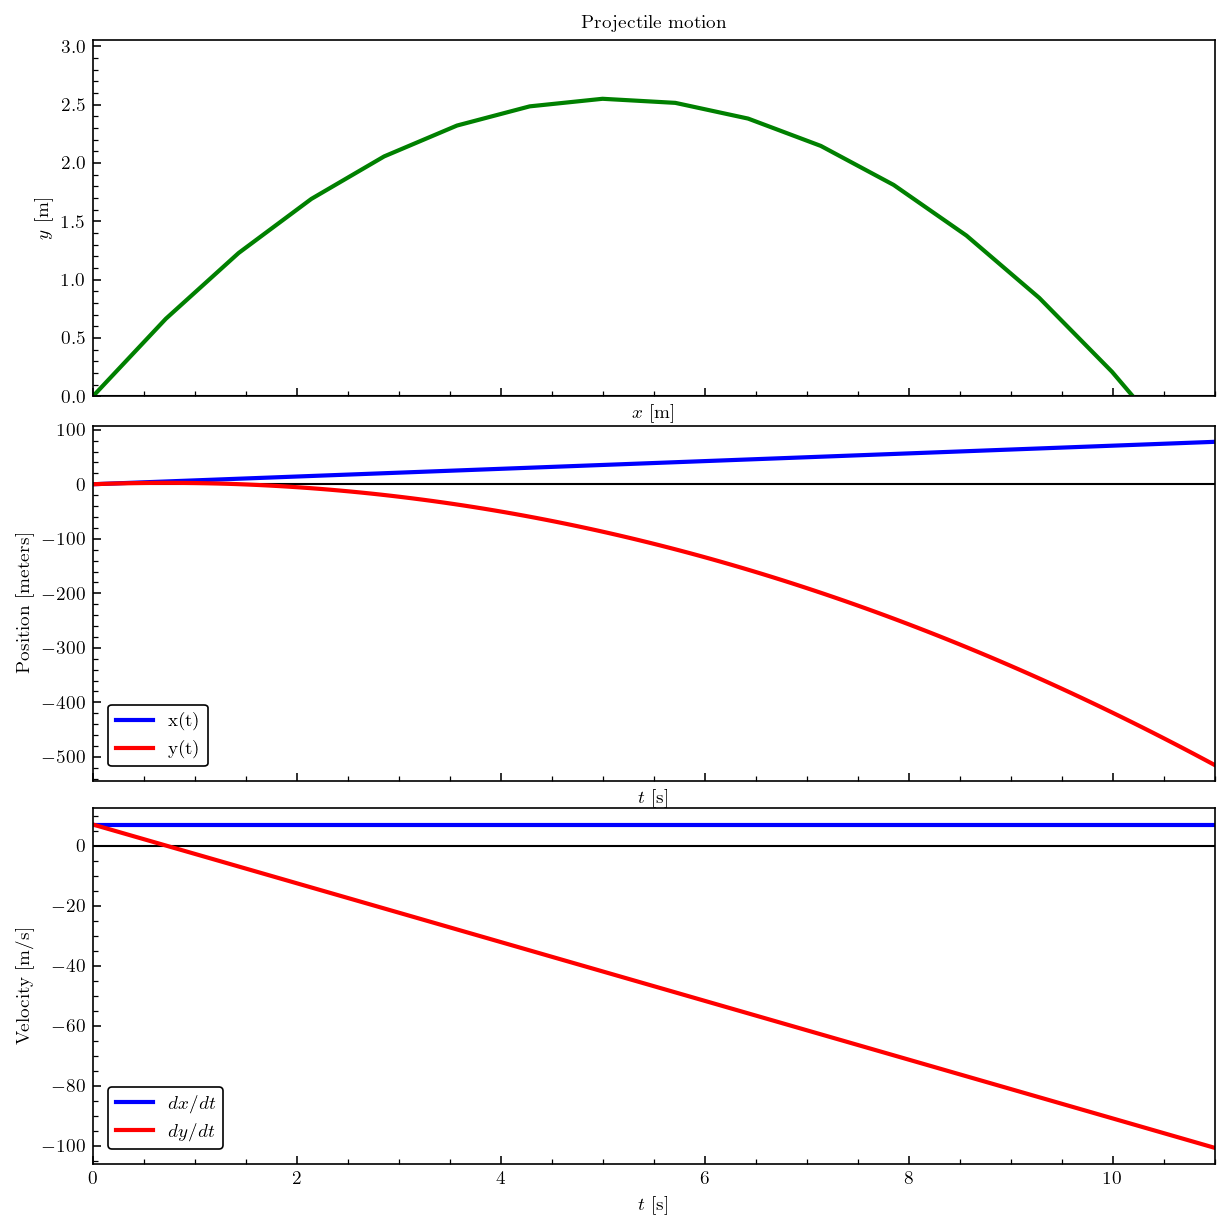

In [10]:
# We need to define our x values and initial condition, then use odeint.
# Important: make sure to convert from degrees to radians.
t_pts = np.linspace(0, 11, 110)

v0 = 10.0 # [v0] = m/s
theta = 45 # [theta] = degrees
rad = theta * (np.pi / 180)

U0_x = [0.0, v0 * np.cos(rad)]
U0_y = [0.0, v0 * np.sin(rad)]

U_sol_x = odeint(dU_dt_x, U0_x, t_pts)
U_sol_y = odeint(dU_dt_y, U0_y, t_pts)

# The ode solver outputs a two-dimensional vector. 
# The first element corresponds to the position, the second to velocity.
x_vals = U_sol_x[:,0]
dx_vals = U_sol_x[:,1]

y_vals = U_sol_y[:,0]
dy_vals = U_sol_y[:,1]

projectile_motion_graph(t_pts, x_vals, y_vals, dx_vals, dy_vals)

### Non-homogeneous differential equation
We now try to solve a more complicated second-order differential equation
<br><br>
$$
y^{\prime \prime} + 2y^{\prime} + y = \cos(2x) \quad \mbox{with} \quad y(0) = y^{\prime}(0) = 0.
$$
<br><br>
We must turn it into two first-order differential equations. Let $u = y^{\prime}$,
<br><br>
$$
u^{\prime} + 2u + y = \cos(2x) \quad \mbox{with} \quad y(0) = u(0) = 0.
$$
<br><br>
We can write this as a vector
<br><br>
$$
  \mathbf{U}(x) = \left(\begin{array}{c}
                         y(x) \\
                         u(x)
                        \end{array}
                  \right)
        \quad\Longrightarrow\quad
    \frac{d\mathbf{U}}{dx} = 
                             \left(\begin{array}{c}
                                    y' \\
                                    u'
                                   \end{array}
                             \right) 
                           =  
                             \left(\begin{array}{c}
                                    u \\
                                    -2 y' - 2 y + \cos(2x)
                                   \end{array}
                             \right)
              \quad\mbox{with}\quad
    \mathbf{U}(0) = \left(\begin{array}{c}
                         0 \\
                         0
                        \end{array}
                  \right).
$$
<br><br>
We now proceed to solve the differential equation using the same process as before.

In [11]:
# First define a function for the derivatives.
def dU_dt(U, x):
    """
    Returns the right side of our first-order differential equation matrix.
    U is a two-component vector with y=U[0] and u=U[1]. 
    Output: [y', u']
    """
    u = U[1]
    u_prime = - 2 * U[1] - 2 * U[0] + np.cos(2 * x) 
    return u, u_prime


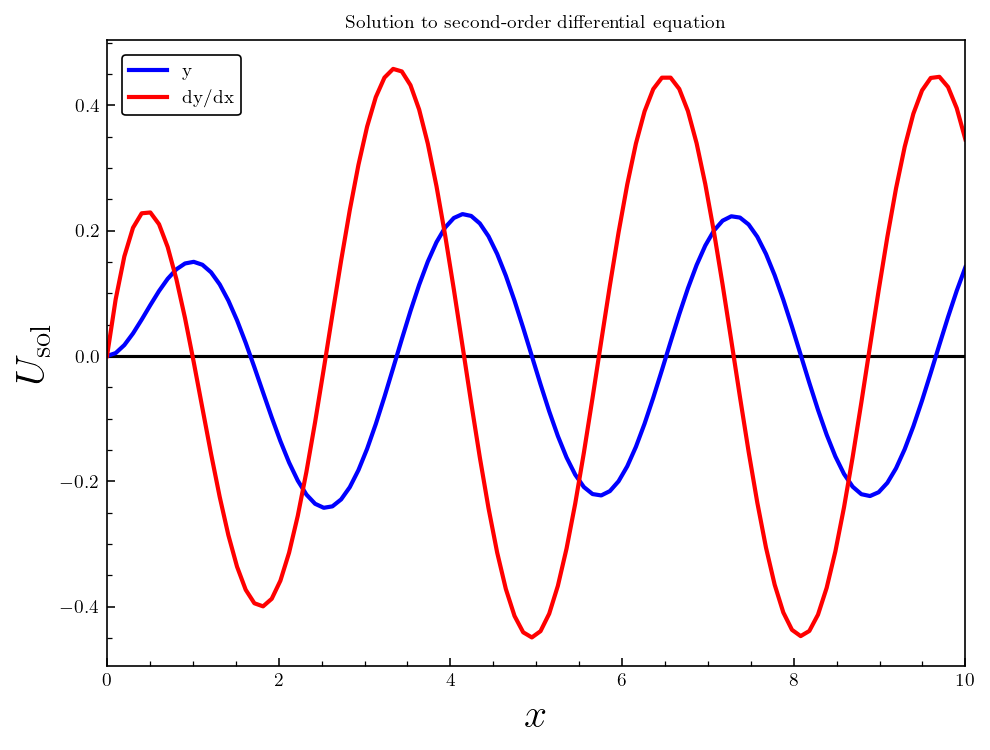

In [12]:
# We need to define our x values and initial condition, then use odeint.
x_pts = np.linspace(0, 10, 100)
U0 = [0.0, 0.0]

U_sol = odeint(dU_dt, U0, x_pts)

# The ode solver outputs a two-dimensional vector. 
# The first element corresponds to the position, the second to velocity.
y_vals = U_sol[:,0]
dy_vals = U_sol[:,1]

second_order_diff_eq_graph(x_pts, y_vals, dy_vals)

## Solving ODEs using solve_ivp solver
We now try solving differential equations using solve_ivp. We take the free-fall problem and the non-homogeneous second-order differential equation as an examples and compare.

In [13]:
np.info(solve_ivp)

 solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False,
           events=None, vectorized=False, args=None, **options)

Solve an initial value problem for a system of ODEs.

This function numerically integrates a system of ordinary differential
equations given an initial value::

    dy / dt = f(t, y)
    y(t0) = y0

Here t is a 1-D independent variable (time), y(t) is an
N-D vector-valued function (state), and an N-D
vector-valued function f(t, y) determines the differential equations.
The goal is to find y(t) approximately satisfying the differential
equations, given an initial value y(t0)=y0.

Some of the solvers support integration in the complex domain, but note
that for stiff ODE solvers, the right-hand side must be
complex-differentiable (satisfy Cauchy-Riemann equations [11]_).
To solve a problem in the complex domain, pass y0 with a complex data type.
Another option always available is to rewrite your problem for real and
imaginary parts separately.

Param

In [14]:
# We first define a function for the derivative.
def dv_dt(y, x):
    """
    Returns the right side of our first-order differential equation.
    """
    g = -9.8
    return g
    

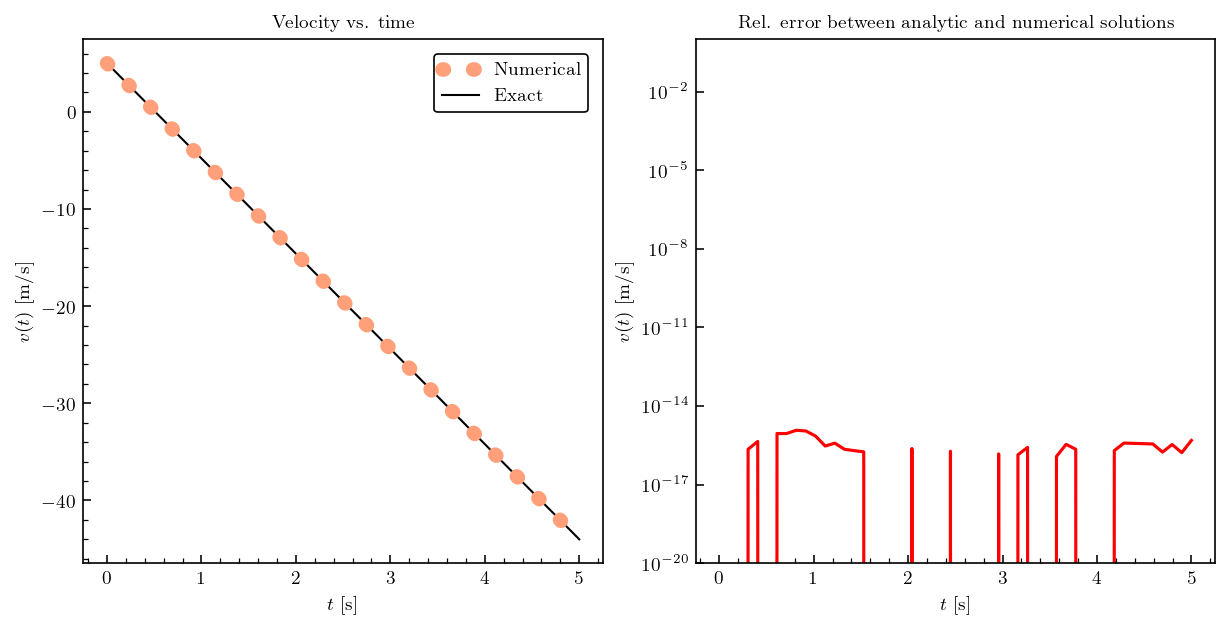

In [15]:
# We need to define our x values and initial condition, then use solve_ivp
# One main difference from before is that you only need to give the initial
# condition in form of a list or array. Another difference is that you give
# an interval over which you want the ODE to be solved. We can also define
# an error tolerance. Arguments for initial conditions and t are inverted.

t_pts = np.linspace(0, 5, 50)
v0 = np.array([5.0])

v_sol = solve_ivp(dv_dt, (t_pts[0],t_pts[-1]), v0, method="RK45",
                  t_eval=t_pts, rtol=1.e-8, atol=1.e-8)

# The ode solver outputs a bunch object with fields. 
# In order to access solutions we must use v_sol.t 
# for time and v_sol.y for position.
# Need to flatten to graph
v_vals = v_sol.y.flatten()

g = -9.8
v_exact = v0 + g * t_pts

velocity_vs_time_graph(t_pts, v_exact, v_vals, "Rel.")

In [16]:
# First define a function for the derivatives.
def dU_dt(x, U):
    """
    Returns the right side of our first-order differential equation matrix.
    U is a two-component vector with y=U[0] and u=U[1]. 
    Output: [y', u']
    """
    u = U[1]
    u_prime = - 2 * U[1] - 2 * U[0] + np.cos(2 * x) 
    return [u, u_prime]


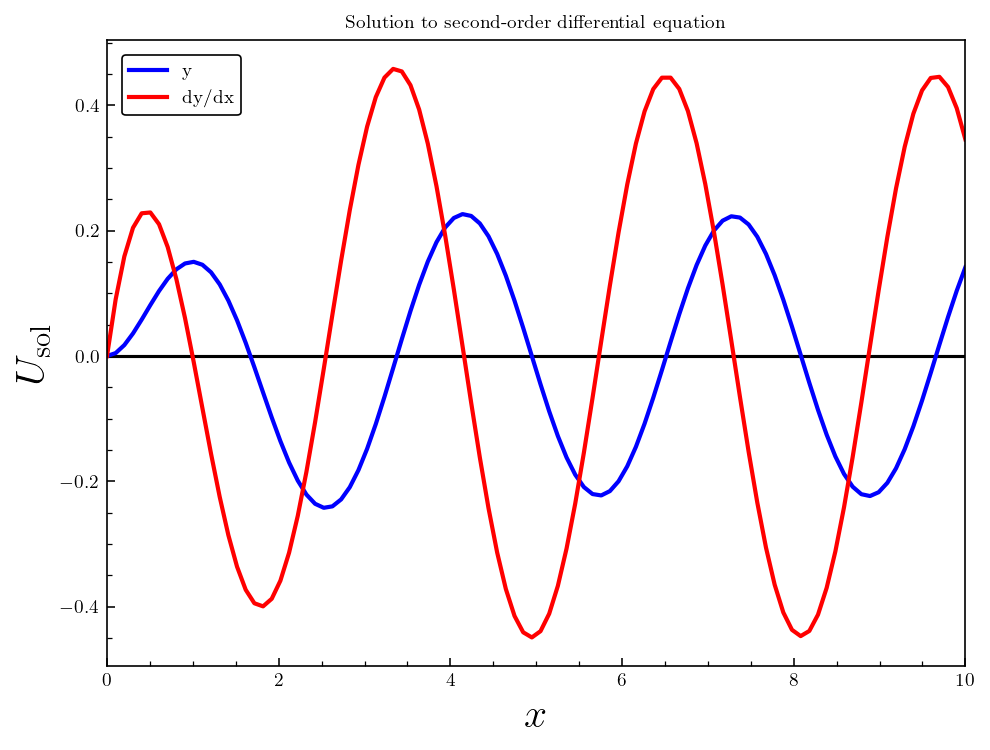

In [17]:
# We need to define our x values and initial condition, then use odeint.
x_pts = np.linspace(0, 10, 100)
U0 = [0.0, 0.0]

U_sol = solve_ivp(dU_dt, (x_pts[0], x_pts[-1]), U0, method="RK45",
                  t_eval=x_pts, rtol=1.e-8, atol=1.e-8)

# The solve_ivp solver outputs a two-dimensional vector. 
# The first element corresponds to y, the second to dy/dx.
y_vals = U_sol.y[0,:]
dy_vals = U_sol.y[1,:]

second_order_diff_eq_graph(x_pts, y_vals, dy_vals)